In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("All libraries loaded")

All libraries loaded


In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="label")

print(X.head())
print(y.value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

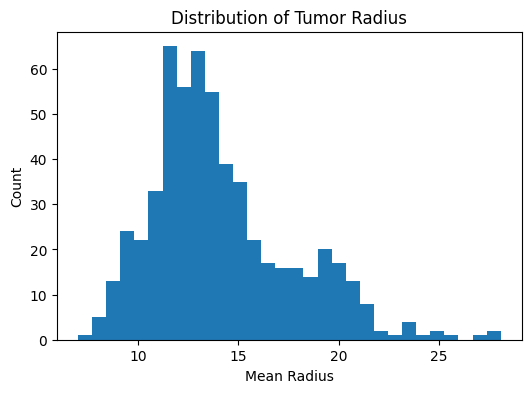

In [4]:
plt.figure(figsize=(6,4))
plt.hist(X["mean radius"], bins=30)
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.title("Distribution of Tumor Radius")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [6]:
import numpy as np

coeffs = pd.Series(model.coef_[0], index=X.columns)
top_features = coeffs.abs().sort_values(ascending=False).head(10)

print(top_features)

texture error           1.417638
worst concavity         1.381959
mean radius             1.078560
worst compactness       0.770857
worst symmetry          0.721116
mean concavity          0.517305
worst texture           0.512529
worst concave points    0.489039
mean perimeter          0.422804
perimeter error         0.393238
dtype: float64


In [7]:
def predict_cancer(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    return prediction, probability

In [8]:
sample = X.mean().values
pred, prob = predict_cancer(sample)

print("Prediction:", "Malignant" if pred == 1 else "Benign")
print("Cancer Probability:", prob)

Prediction: Benign
Cancer Probability: 0.3712804157418337


In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
def predict_cancer(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    return prediction, probability

In [13]:
sample = X.mean().values
pred, prob = predict_cancer(sample)

print("Prediction:", "Malignant" if pred == 1 else "Benign")
print("Cancer Probability:", prob)

Prediction: Benign
Cancer Probability: 0.40510507169932475


In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
feature_names = data.feature_names

In [16]:
import pandas as pd

importance = pd.Series(
    model.coef_[0],
    index=feature_names
).sort_values(ascending=False)

importance.head(10)

texture error              1.395082
mean radius                0.988486
mean texture               0.225873
worst radius               0.096452
compactness error          0.045529
mean area                  0.026148
fractal dimension error    0.011312
worst area                -0.016558
worst perimeter           -0.016866
smoothness error          -0.021811
dtype: float64

In [18]:
def predict_from_input(input_list):
    pred, prob = predict_cancer(input_list)
    return {
        "prediction": "Malignant" if pred == 1 else "Benign",
        "probability": prob
    }

In [19]:
example_patient = [
    14.2, 20.1, 92.3, 654.1, 0.12,
    0.18, 0.21, 0.10, 0.18, 0.06,
    0.30, 1.2, 2.5, 30.1, 0.006,
    0.04, 0.05, 0.02, 0.01, 0.002,
    16.5, 25.3, 108.2, 820.0, 0.14,
    0.28, 0.31, 0.15, 0.29, 0.08
]

In [20]:
result = predict_from_input(example_patient)
result

{'prediction': 'Malignant', 'probability': np.float64(0.845484649504141)}